# Hierachical

In [1]:
import os
#os.chdir('???')
os.getcwd()

'c:\\Users\\PPUNN\\Documents\\gitproject\\stat_assignment2\\clustering'

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
%matplotlib inline

mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [4]:
orig_df = pd.read_csv("clustering_data.csv")
orig_df

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7


In [5]:
orig_df.describe()

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,27195.485000,6160.595000,19022.945000,27206.26000,19430.800000,99016.085000
std,54545.204505,6930.912416,41009.446754,58029.94422,56140.041536,116020.051845
min,822.000000,531.200000,375.700000,30.70000,79.800000,2279.200000
25%,2295.525000,1416.800000,820.500000,701.77500,709.800000,8108.025000
50%,6904.600000,2514.450000,3377.150000,1941.70000,1556.950000,34313.300000
75%,14581.200000,9455.200000,15075.950000,13447.32500,3102.775000,156841.400000
max,223199.600000,24102.900000,177009.100000,235503.60000,244863.500000,356449.700000


In [6]:
df = orig_df[['งบบุคลากร','งบดําเนินงาน','งบลงทุน', 'งบเงินอุดหนุน','งบรายจ่ายอื่น']]
df

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
0,4104.5,3078.3,6104.3,12397.0,13606.8
1,91027.4,24102.9,14426.1,4794.4,80179.8
2,12988.2,6567.9,3421.2,599.4,244863.5
3,2697.3,2509.6,397.5,1348.7,1203.3
4,1572.6,892.1,1564.4,735.9,1327.7
5,2746.6,2519.3,397.8,16598.3,79.8
6,11248.4,939.9,9956.4,104384.6,1597.7
7,24376.6,11495.8,72292.8,2001.1,564.8
8,9704.7,2436.2,177009.1,57.1,751.6
9,1311.6,2009.9,1243.4,1945.8,1791.0


In [7]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [8]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [9]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

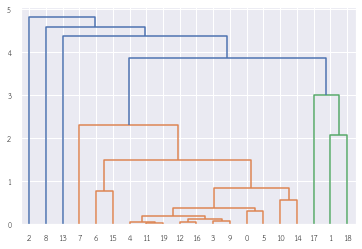

In [15]:
plot_dendrogram(model, truncate_mode='level', p=10)

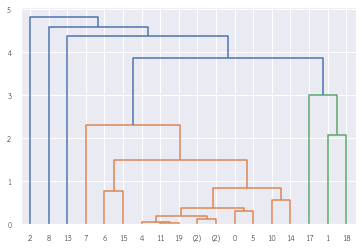

In [16]:
plot_dendrogram(model, truncate_mode='level', p=9)

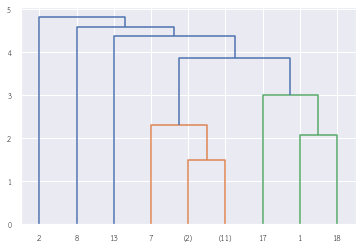

In [17]:
plot_dendrogram(model, truncate_mode='level', p=5)

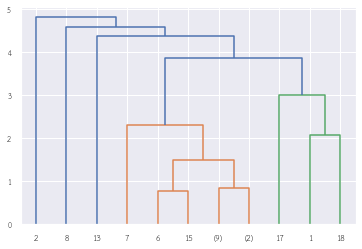

In [18]:
plot_dendrogram(model, truncate_mode='level', p=6)

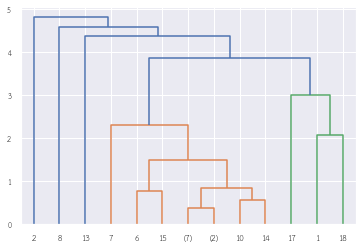

In [19]:
plot_dendrogram(model, truncate_mode='level', p=7)

ขอเลือก p เป็น 7 
และ ขอเลือก dist_threshold_val เป็น 2 เพราะมีการแบ่งที่ไม่มากไป หรือน้อยจนเกินไป

In [20]:
dist_threshold_val = 2
nclusters_val = None

In [21]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=2, linkage='average',
                        n_clusters=None)

In [22]:
labels = model.labels_
labels

array([0, 7, 3, 0, 0, 0, 0, 6, 5, 0, 0, 0, 0, 4, 0, 0, 0, 2, 1, 0],
      dtype=int64)

In [23]:
cluster_predictions = model.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

C:\Users\PPUNN\AppData\Local\Temp/ipykernel_20424/2879177908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
0,4104.5,3078.3,6104.3,12397.0,13606.8,0
1,91027.4,24102.9,14426.1,4794.4,80179.8,7
2,12988.2,6567.9,3421.2,599.4,244863.5,3
3,2697.3,2509.6,397.5,1348.7,1203.3,0
4,1572.6,892.1,1564.4,735.9,1327.7,0
5,2746.6,2519.3,397.8,16598.3,79.8,0
6,11248.4,939.9,9956.4,104384.6,1597.7,0
7,24376.6,11495.8,72292.8,2001.1,564.8,6
8,9704.7,2436.2,177009.1,57.1,751.6,5
9,1311.6,2009.9,1243.4,1945.8,1791.0,0


## Silhouette_score
ยิ่งใกล้ 1 ยิ่งน่าเชื่อถือ

In [24]:
print(metrics.silhouette_score(df,labels))

0.4147178198095811


## Davies_bouldin_score
ยิ่งใกล้ 0 ยิ่งน่าเชื่อถือ

In [25]:
print(metrics.davies_bouldin_score(df,model.labels_))

0.18039466082109623


In [26]:
df.cluster_id.value_counts()

0    13
7     1
3     1
6     1
5     1
4     1
2     1
1     1
Name: cluster_id, dtype: int64

## 8 Clusters

#### Cluster 0

In [38]:
df[df.cluster_id==0].mean()

งบบุคลากร         4285.000000
งบดําเนินงาน      2419.238462
งบลงทุน           2954.292308
งบเงินอุดหนุน    15838.707692
งบรายจ่ายอื่น     2189.023077
cluster_id           0.000000
dtype: float64

In [39]:
orig_df[df.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
0,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,39290.9
3,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,8156.4
4,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,6092.7
5,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,22341.8
6,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,128127.0
9,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,8301.7
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,29335.7
11,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,2279.2
12,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,6825.5
14,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,26828.1


#### Cluster 1

In [40]:
df[df.cluster_id==1].mean()

งบบุคลากร        107548.0
งบดําเนินงาน      14411.4
งบลงทุน           17025.5
งบเงินอุดหนุน      6637.5
งบรายจ่ายอื่น       179.9
cluster_id            1.0
dtype: float64

In [41]:
orig_df[df.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
18,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,145802.3


#### Cluster 2

In [42]:
df[df.cluster_id==2].mean()

งบบุคลากร        223199.6
งบดําเนินงาน      20029.5
งบลงทุน           19437.0
งบเงินอุดหนุน     88628.9
งบรายจ่ายอื่น      5154.7
cluster_id            2.0
dtype: float64

In [ ]:
orig_df[df.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
18,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,145802.3


#### Cluster 3

In [43]:
df[df.cluster_id==3].mean()

งบบุคลากร         12988.2
งบดําเนินงาน       6567.9
งบลงทุน            3421.2
งบเงินอุดหนุน       599.4
งบรายจ่ายอื่น    244863.5
cluster_id            3.0
dtype: float64

In [44]:
orig_df[df.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
2,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,268440.2


#### Cluster 4

In [45]:
df[df.cluster_id==4].mean()

งบบุคลากร         19360.2
งบดําเนินงาน      12718.1
งบลงทุน           38441.4
งบเงินอุดหนุน    235503.6
งบรายจ่ายอื่น     28464.4
cluster_id            4.0
dtype: float64

In [47]:
orig_df[df.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
13,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,334487.7


#### Cluster 5

In [48]:
df[df.cluster_id==5].mean()

งบบุคลากร          9704.7
งบดําเนินงาน       2436.2
งบลงทุน          177009.1
งบเงินอุดหนุน        57.1
งบรายจ่ายอื่น       751.6
cluster_id            5.0
dtype: float64

In [50]:
orig_df[df.cluster_id==5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
8,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,189958.7


#### Cluster 6

In [53]:
df[df.cluster_id==6].mean()

งบบุคลากร        24376.6
งบดําเนินงาน     11495.8
งบลงทุน          72292.8
งบเงินอุดหนุน     2001.1
งบรายจ่ายอื่น      564.8
cluster_id           6.0
dtype: float64

In [55]:
orig_df[df.cluster_id==6]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
7,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,110731.1


#### Cluster 7

In [56]:
df[df.cluster_id==7].mean()

งบบุคลากร        91027.4
งบดําเนินงาน     24102.9
งบลงทุน          14426.1
งบเงินอุดหนุน     4794.4
งบรายจ่ายอื่น    80179.8
cluster_id           7.0
dtype: float64

In [58]:
orig_df[df.cluster_id==7]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
1,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,214530.6
